# Covid Patient Prediction Project

In [21]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,10)})

In [14]:
df = pd.read_csv('covid.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [4]:
df.date_died.value_counts()

9999-99-99    530426
08-06-2020       701
16-06-2020       699
10-06-2020       691
12-06-2020       674
               ...  
21-02-2020         1
09-03-2020         1
30-01-2020         1
04-03-2020         1
29-01-2020         1
Name: date_died, Length: 124, dtype: int64

### EDA

<AxesSubplot:xlabel='covid_res', ylabel='count'>

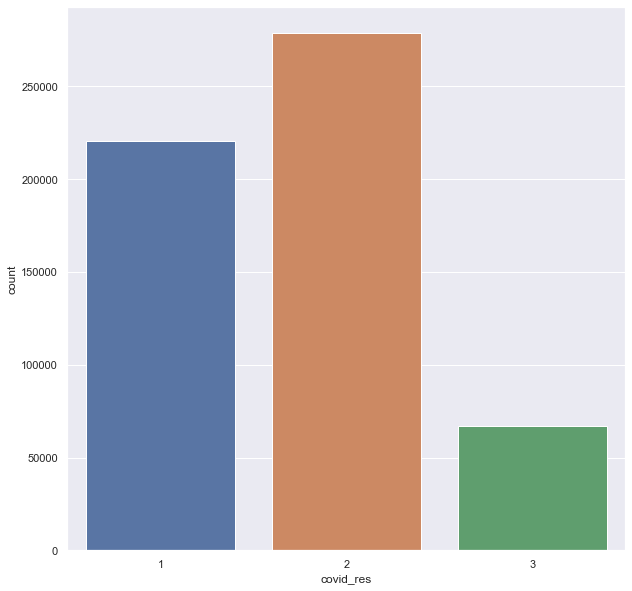

In [7]:
sns.countplot(data=df, x='covid_res')

In [16]:
# Drop the pending result
filtered_df = df[df['covid_res'] != 3]

<AxesSubplot:xlabel='covid_res', ylabel='count'>

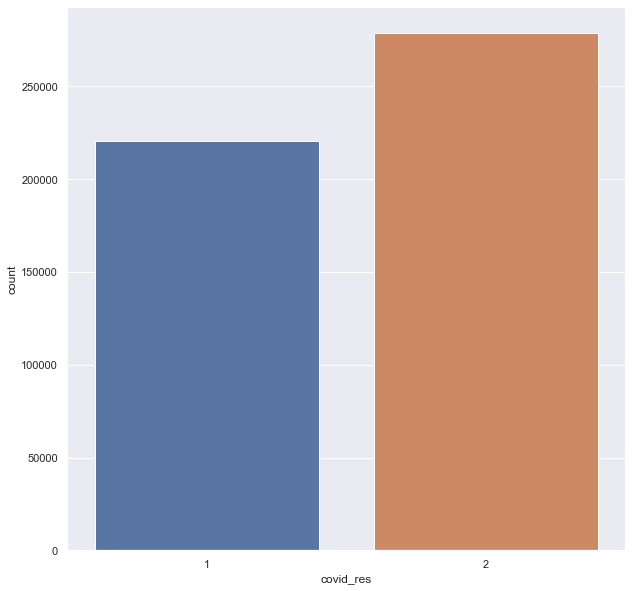

In [17]:
sns.countplot(data=filtered_df, x='covid_res')

c:\Users\ommar\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


<AxesSubplot:xlabel='covid_res', ylabel='count'>

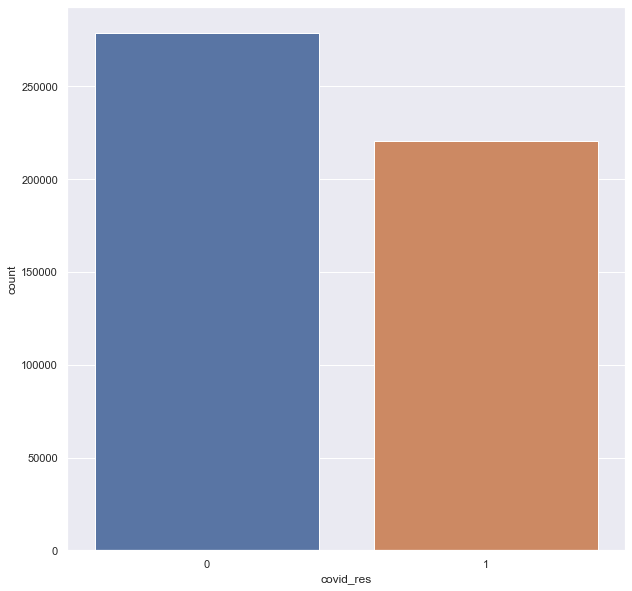

In [20]:
filtered_df.replace(2, 0, inplace=True)
sns.countplot(data=filtered_df, x='covid_res')

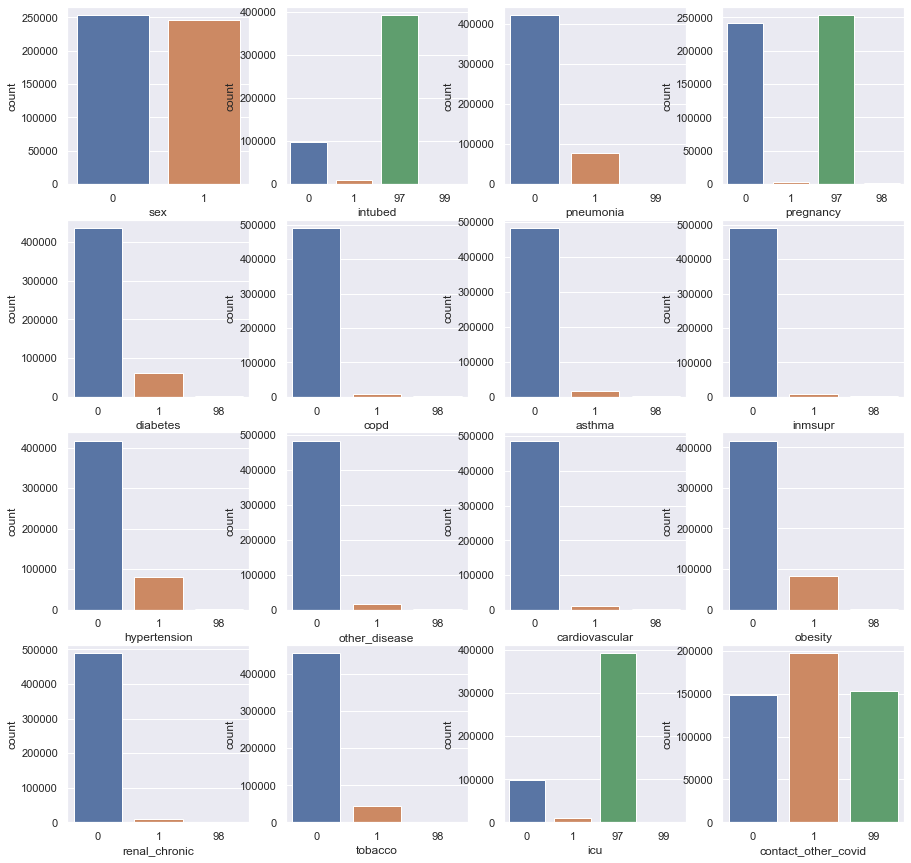

In [23]:
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

features = [
    ['sex', 'intubed', 'pneumonia', 'pregnancy'],
    ['diabetes', 'copd', 'asthma', 'inmsupr'],
    ['hypertension', 'other_disease', 'cardiovascular', 'obesity'],
    ['renal_chronic', 'tobacco', 'icu', 'contact_other_covid']
    ]

for i in range(4):
    for j in range(4):
        col = features[i][j]
        sns.countplot(data=filtered_df, x=col, ax=ax[i][j])

<AxesSubplot:xlabel='patient_type', ylabel='count'>

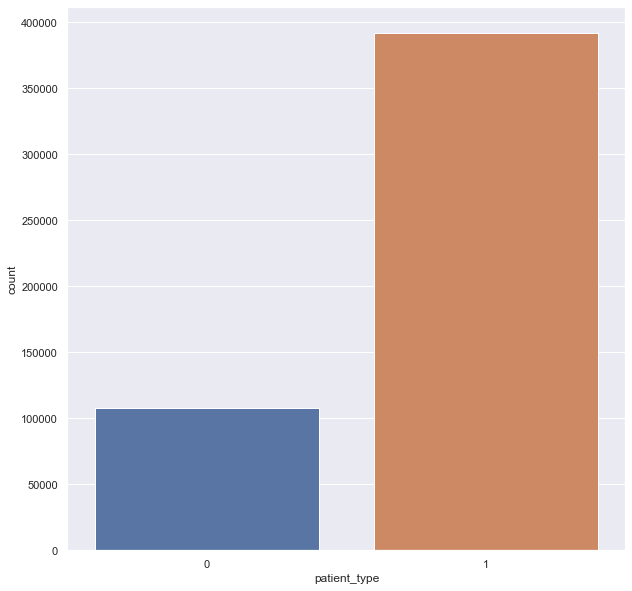

In [25]:
sns.countplot(data=filtered_df, x='patient_type')

<AxesSubplot:xlabel='age', ylabel='Count'>

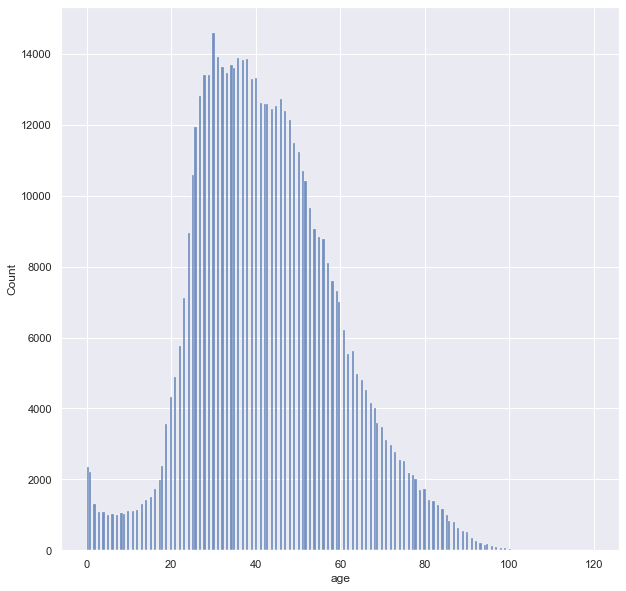

In [26]:
sns.histplot(data=df, x='age')

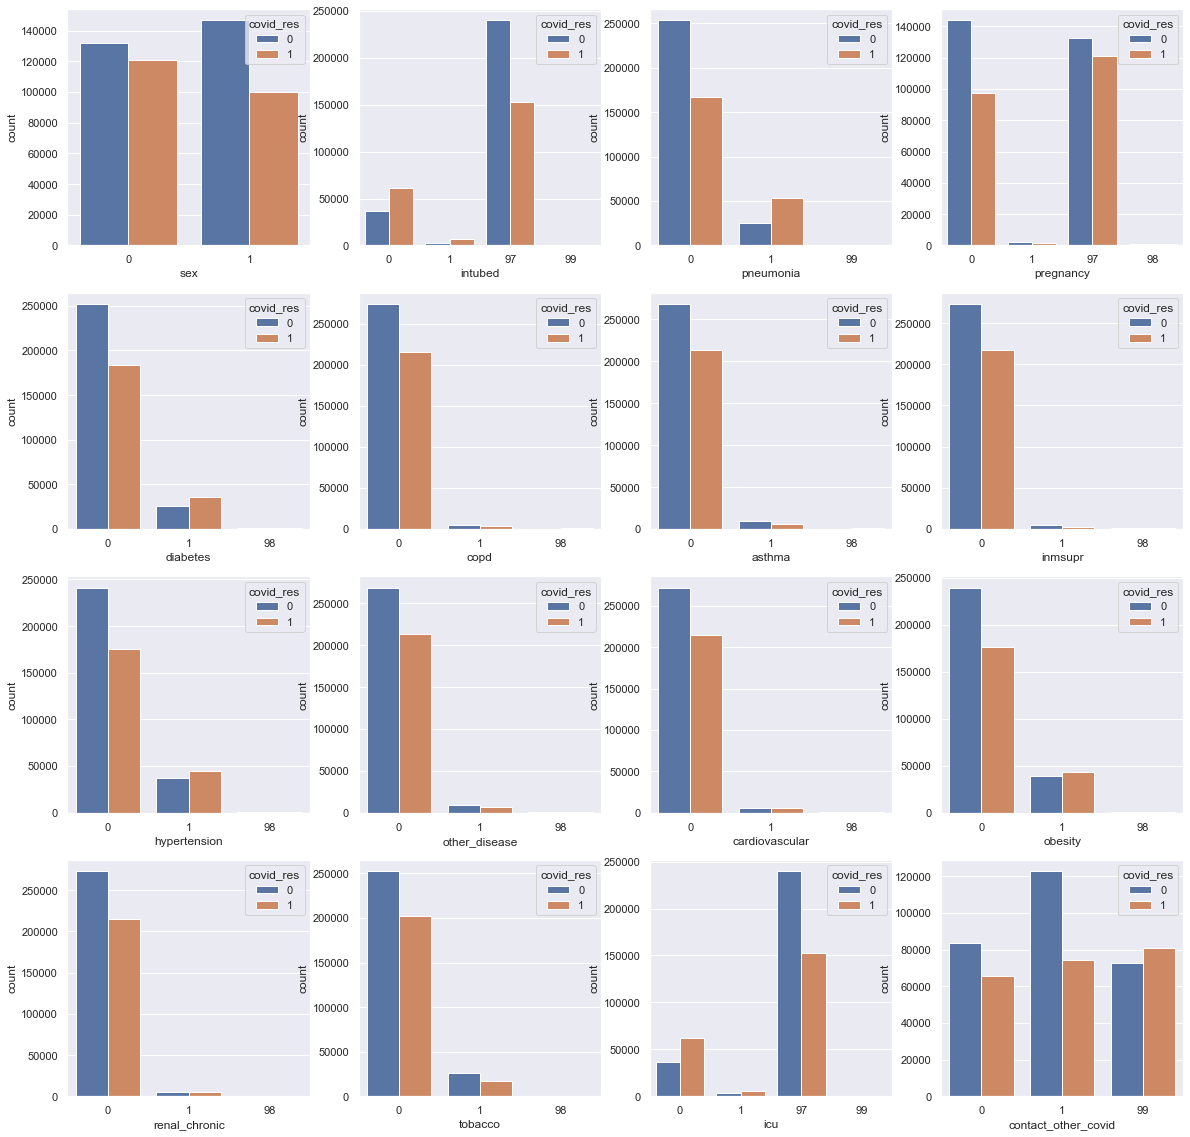

In [28]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

features = [
    ['sex', 'intubed', 'pneumonia', 'pregnancy'],
    ['diabetes', 'copd', 'asthma', 'inmsupr'],
    ['hypertension', 'other_disease', 'cardiovascular', 'obesity'],
    ['renal_chronic', 'tobacco', 'icu', 'contact_other_covid']
    ]

for i in range(4):
    for j in range(4):
        col = features[i][j]
        sns.countplot(data=filtered_df, x=col, hue='covid_res', ax=ax[i][j])

<AxesSubplot:>

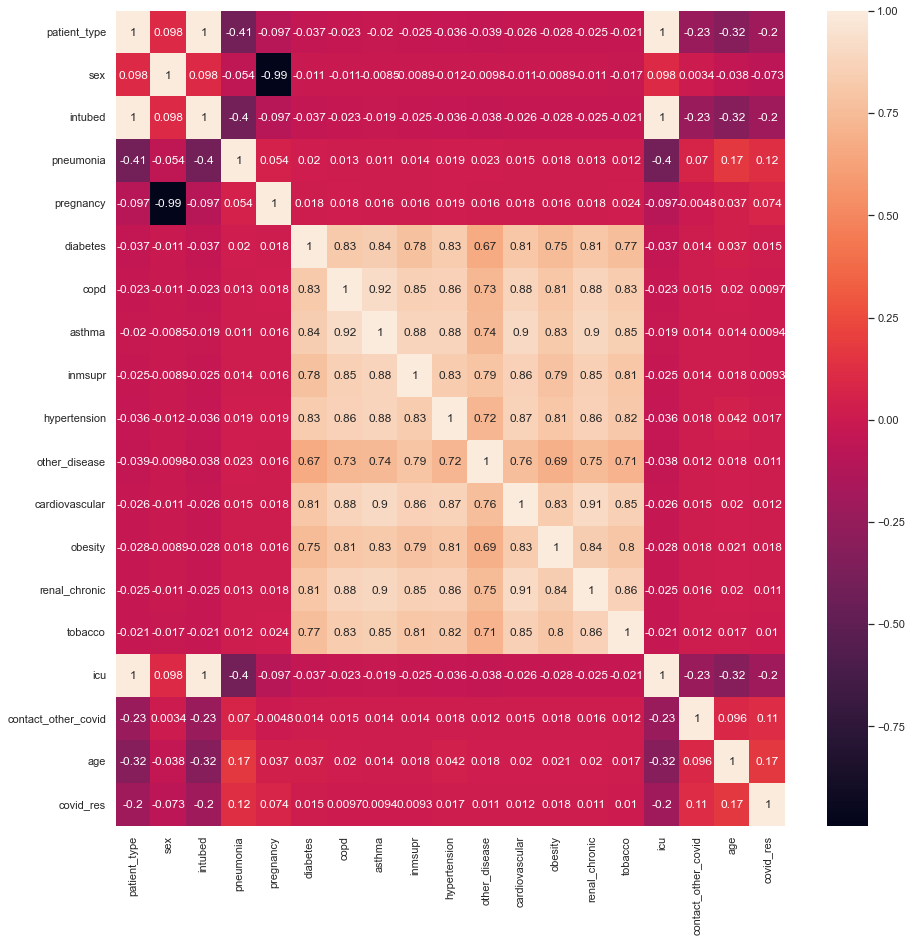

In [31]:
features = ['patient_type', 'sex', 'intubed', 'pneumonia', 'pregnancy',
            'diabetes', 'copd', 'asthma', 'inmsupr',
            'hypertension', 'other_disease', 'cardiovascular', 'obesity',
            'renal_chronic', 'tobacco', 'icu', 'contact_other_covid', 'age', 'covid_res']
    
corr = filtered_df[features].corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

## Feature Engineering

In [32]:
filtered_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,0,1,04-05-2020,02-05-2020,9999-99-99,97,0,27,97,...,0,0,0,0,0,0,0,0,1,97
1,1009bf,0,1,19-03-2020,17-03-2020,9999-99-99,97,0,24,97,...,0,0,0,0,0,0,0,99,1,97
2,167386,1,0,06-04-2020,01-04-2020,9999-99-99,0,0,54,0,...,0,0,0,0,1,0,0,99,1,0
3,0b5948,0,0,17-04-2020,10-04-2020,9999-99-99,0,1,30,97,...,0,0,0,0,0,0,0,99,1,0
4,0d01b5,1,0,13-04-2020,13-04-2020,22-04-2020,0,0,60,0,...,0,1,0,1,0,0,0,99,1,0


In [34]:
filtered_df['entry_date'] = pd.to_datetime(filtered_df['entry_date'])
filtered_df['date_symptoms'] = pd.to_datetime(filtered_df['date_symptoms'])
filtered_df['died'] = filtered_df['date_died'].apply(lambda date: 1 if date == '9999-99-99' else 0)

<ipython-input-34-66e4caedf053>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['entry_date'] = pd.to_datetime(filtered_df['entry_date'])
<ipython-input-34-66e4caedf053>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date_symptoms'] = pd.to_datetime(filtered_df['date_symptoms'])
<ipython-input-34-66e4caedf053>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [35]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   499692 non-null  object        
 1   sex                  499692 non-null  int64         
 2   patient_type         499692 non-null  int64         
 3   entry_date           499692 non-null  datetime64[ns]
 4   date_symptoms        499692 non-null  datetime64[ns]
 5   date_died            499692 non-null  object        
 6   intubed              499692 non-null  int64         
 7   pneumonia            499692 non-null  int64         
 8   age                  499692 non-null  int64         
 9   pregnancy            499692 non-null  int64         
 10  diabetes             499692 non-null  int64         
 11  copd                 499692 non-null  int64         
 12  asthma               499692 non-null  int64         
 13  inmsupr       

In [36]:
filtered_df['symptoms_duration'] = filtered_df['date_symptoms'] - filtered_df['entry_date']
filtered_df.head()

<ipython-input-36-4ba7e0e5a54a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['symptoms_duration'] = filtered_df['date_symptoms'] - filtered_df['entry_date']


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,died,symptoms_duration
0,16169f,0,1,2020-04-05,2020-02-05,9999-99-99,97,0,27,97,...,0,0,0,0,0,0,1,97,1,-60 days
1,1009bf,0,1,2020-03-19,2020-03-17,9999-99-99,97,0,24,97,...,0,0,0,0,0,99,1,97,1,-2 days
2,167386,1,0,2020-06-04,2020-01-04,9999-99-99,0,0,54,0,...,0,0,1,0,0,99,1,0,1,-152 days
3,0b5948,0,0,2020-04-17,2020-10-04,9999-99-99,0,1,30,97,...,0,0,0,0,0,99,1,0,1,170 days
4,0d01b5,1,0,2020-04-13,2020-04-13,22-04-2020,0,0,60,0,...,0,1,0,0,0,99,1,0,0,0 days


In [37]:
filtered_df['symptoms_duration'] = filtered_df['symptoms_duration'].dt.days
filtered_df.head()

<ipython-input-37-8ad1313a81f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['symptoms_duration'] = filtered_df['symptoms_duration'].dt.days


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,died,symptoms_duration
0,16169f,0,1,2020-04-05,2020-02-05,9999-99-99,97,0,27,97,...,0,0,0,0,0,0,1,97,1,-60
1,1009bf,0,1,2020-03-19,2020-03-17,9999-99-99,97,0,24,97,...,0,0,0,0,0,99,1,97,1,-2
2,167386,1,0,2020-06-04,2020-01-04,9999-99-99,0,0,54,0,...,0,0,1,0,0,99,1,0,1,-152
3,0b5948,0,0,2020-04-17,2020-10-04,9999-99-99,0,1,30,97,...,0,0,0,0,0,99,1,0,1,170
4,0d01b5,1,0,2020-04-13,2020-04-13,22-04-2020,0,0,60,0,...,0,1,0,0,0,99,1,0,0,0


<AxesSubplot:xlabel='died', ylabel='count'>

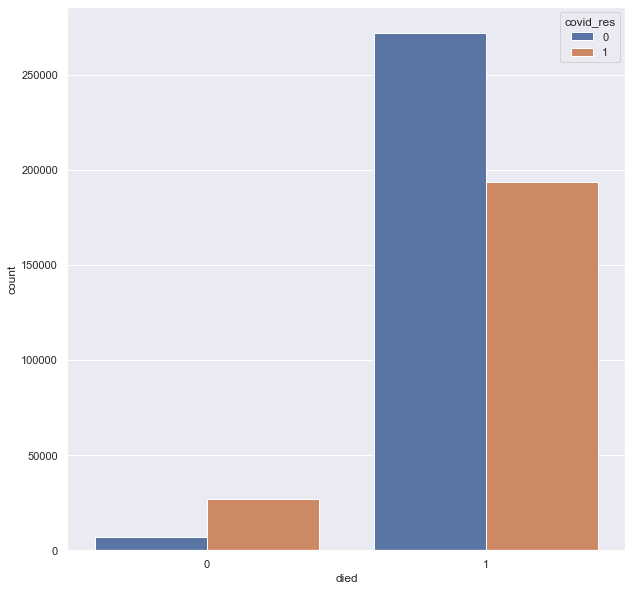

In [39]:
sns.countplot(data=filtered_df, x='died', hue='covid_res')

<AxesSubplot:xlabel='age', ylabel='symptoms_duration'>

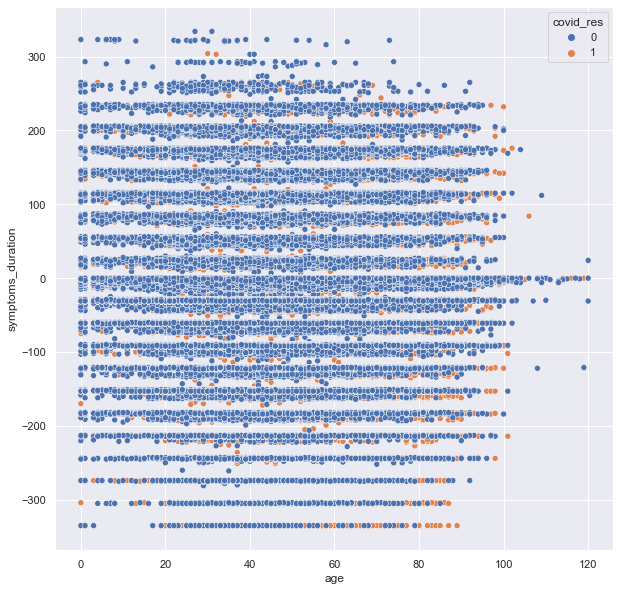

In [40]:
sns.scatterplot(data=filtered_df, x='age', y='symptoms_duration', hue='covid_res')

<AxesSubplot:>

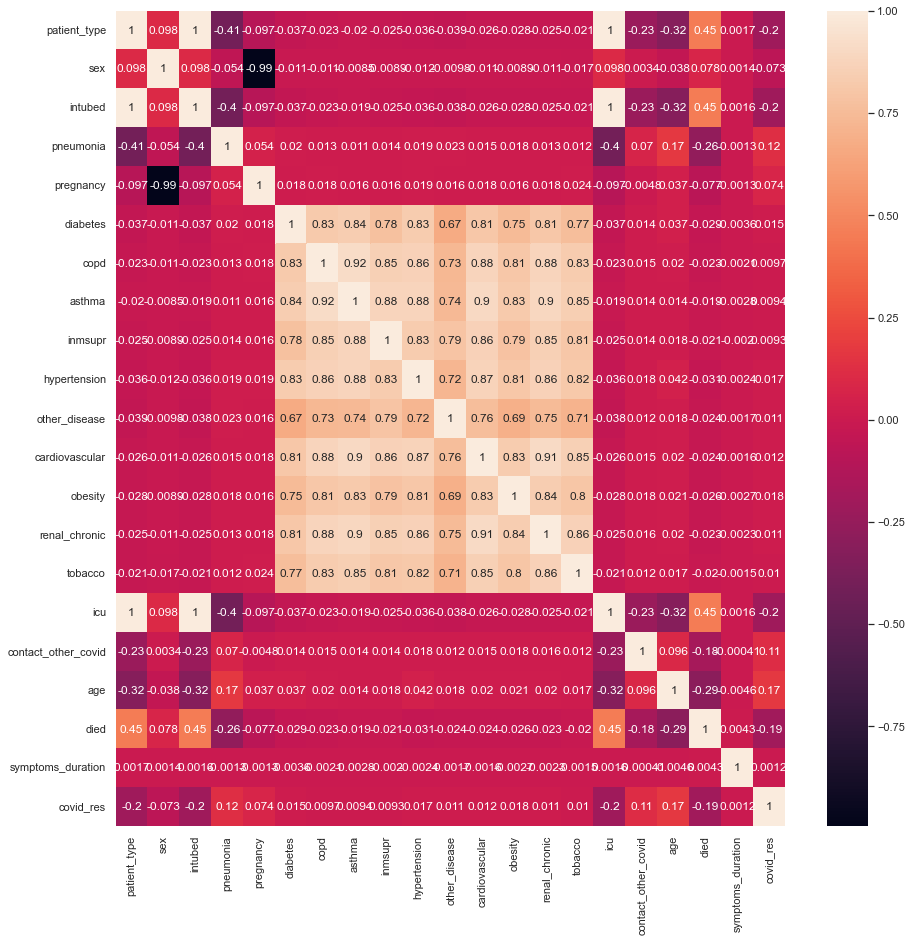

In [41]:
features = ['patient_type', 'sex', 'intubed', 'pneumonia', 'pregnancy',
            'diabetes', 'copd', 'asthma', 'inmsupr',
            'hypertension', 'other_disease', 'cardiovascular', 'obesity',
            'renal_chronic', 'tobacco', 'icu', 'contact_other_covid', 'age', 'died', 'symptoms_duration', 'covid_res']
    
corr = filtered_df[features].corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

## Modelling

In [42]:
x = filtered_df[['sex', 'intubed', 'age', 'died', 'contact_other_covid', 'pneumonia', 'hypertension', 'obesity', 'diabetes']]
y = filtered_df['covid_res']

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train

,sex,intubed,age,died,contact_other_covid,pneumonia,hypertension,obesity,diabetes
44715,0,97,38,1,0,0,0,0,1
59961,1,97,44,1,99,0,0,0,0
96643,1,0,55,1,99,0,0,1,0
95349,0,0,62,1,1,1,0,0,0
313714,1,97,16,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
250180,0,0,25,1,0,0,0,0,0
137155,0,97,48,1,0,1,0,0,0
489573,1,97,62,1,0,0,1,1,1
72093,1,97,38,1,99,0,0,0,0


In [44]:
y_train

44715     1
59961     1
96643     1
95349     1
313714    0
         ..
250180    0
137155    1
489573    0
72093     1
161380    1
Name: covid_res, Length: 399753, dtype: int64

In [45]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier()
xgb = XGBClassifier()

In [46]:
rf.fit(x_train, y_train)
xgb.fit(x_train, y_train)

c:\Users\ommar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:09:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
rf_pred = rf.predict(x_test)
xgb_pred = xgb.predict(x_test)

In [48]:
from sklearn.metrics import classification_report

print("Random Forest Result: ")
print(classification_report(y_test, rf_pred))

print("XGBoost Result: ")
print(classification_report(y_test, xgb_pred))

Random Forest Result: 
              precision    recall  f1-score   support

           0       0.63      0.83      0.72     55825
           1       0.64      0.37      0.47     44114

    accuracy                           0.63     99939
   macro avg       0.63      0.60      0.59     99939
weighted avg       0.63      0.63      0.61     99939

XGBoost Result: 
              precision    recall  f1-score   support

           0       0.63      0.84      0.72     55825
           1       0.66      0.39      0.49     44114

    accuracy                           0.64     99939
   macro avg       0.64      0.61      0.60     99939
weighted avg       0.64      0.64      0.62     99939



In [49]:
print(f"Random Forest Score: {rf.score(x_test, y_test)}")
print(f"XGBoost Score: {xgb.score(x_test, y_test)}")

Random Forest Score: 0.6294639730235444
XGBoost Score: 0.639670198821281


## Save the model

In [ ]:
!pip install joblib

In [50]:
import joblib

In [51]:
joblib.dump(xgb, 'model.h5')

['model.h5']

In [54]:
 df = pd.DataFrame.from_dict(
            {

                'sex':['Male']
            }
        )

df.head()

,sex
0,Male
